<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>

# Geopandas
_developed by Davíd Brakenhoff & Onno Ebbens_
<hr>

This notebook shows some of the basic functionality of the geopandas module. Geopandas combines the power of shapefiles with the power of Pandas for working with large datasets.

### Contents
1. [Installing geopandas](#1)
2. [Importing geopandas](#2)
3. [Reading shapefiles](#3)
4. [Viewing attribute table](#4)
5. [Plotting data](#5)

## 1. [Installing geopandas](#top)<a id="1"></a>
`geopandas`is a notoriously difficult module to install without getting vague errors. It has gotten better recently (this was written early 2019) so hopefully this step will be a breeze for you. Otherwise, if you do have trouble, you're not the only one.

There are two methods of getting geopandas that have worked consistently on my PC. The first uses `conda` which is available if you have installed the Anaconda Python distribution or Miniconda distribution. The second uses precompiled packages (called wheels) from a website.

### Using conda
This step assumes you have `conda` installed, via the Anaconda Python Distribution or Miniconda, and it's quite straightforward. Type `conda install geopandas` into the Anaconda Prompt, and wait. Confirm the installation by pressing `y` when prompted. Afterwards start a new Anaconda Prompt, type `python` and then once Python has started up, type `import geopandas`. If you don't see any errors, congratulations, this worked so you can continue to step 2.

If you do see an error you could try to install geopandas from the conda-forge channel (a different location from which to get python packages). You can do this by typing `conda install -c conda-forge geopandas` into the Anaconda Prompt.

### Using wheels and pip
Download the following packages from this [Christoph Gohlke's website](https://www.lfd.uci.edu/~gohlke/pythonlibs):
- GDAL
- Fiona
- geopandas

Use CTRL+F to find the download link on the page. Be sure to download the correct version of the package. The Python version should match your Python version (see Help > About in the Jupyter Notebook if you're not sure which Python version you have). Also the architecture should match (i.e. 64bits vs 32bits). For example:

- GDAL‑2.3.3‑cp37‑cp37m‑win_amd64.whl

This is the latest GDAL version as of writing this notebook for Python 3.7 (as can be seen from the cp37 in the name), for 64-bits Python (as derived from the amd64 in the name). This is usually the one you want (latest Python, 64 bits).

Once you have downloaded the correct files, open Anaconda Prompt, and navigate to the directory in which you saved your downloads. Now type the following commands (the order is important):
1. `pip install GDAL‑2.3.3‑cp37‑cp37m‑win_amd64.whl`
2. `pip install Fiona‑1.8.5‑cp37‑cp37m‑win_amd64.whl`
3. `pip install geopandas‑0.4.1‑py2.py3‑none‑any.whl` (Note that the geopandas download is not python or archtecture specific)

If these steps complete succesfully, open a new Anaconda Prompt, start Python and try to `import geopandas`. If it works without any error messages, congrats and move to step 2.


## 2. [Importing geopandas](#top)<a id="2"></a>

This is easy!

In [1]:
import geopandas as gpd

Set plotting settings to show figures inline.

In [2]:
%matplotlib inline

## 3. [Reading shapefiles](#top)<a id="3"></a>
This is done using the `gpd.read_file()` function

In [3]:
fileName = r"shapefile/Rotterdam_centraal.shp" ##file name
gdf = gpd.read_file(fileName)

## 4. [Viewing attribute table](#top)<a id="4"></a>
The attribute table is loaded as a GeoDataFrame which is similar to a `pandas.DataFrame`. This one isn't very exciting, but you get the idea.

In [4]:
gdf

,id,geometry
0,1,"POLYGON ((91681.10904152563 437839.9123515636,..."
1,2,"POLYGON ((91662.63217566675 437612.452710302, ..."


In [5]:
print(type(gdf))

<class 'geopandas.geodataframe.GeoDataFrame'>


Operations you can do on `pandas.DataFrames` are also available on `GeoDataFrames`. 

In [6]:
gdf.loc[1, "id"]

2

In [7]:
gdf["id"].sum()

3

## 5. [Plotting data](#top)<a id="5"></a>

Plotting a shapefile using geopandas is easy!

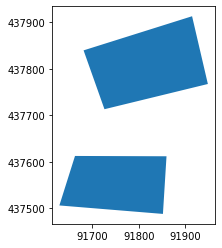

In [8]:
gdf.plot()